<center>
<img src="./pict/geopandas.png">
<br />
<br />

In [23]:
import shapely #работа с полигонами, точками и другими форматами представления геоданных
import geopandas as gpd

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#!pip install geopandas # установка geopandas, или так: !conda install --channel conda-forge geopandas

In [25]:
from shapely.geometry import Polygon, Point, LineString #основные структуры данных -- 
#точка, полигон (объед точек, площадь внутри него), линия - объед точек/границ

p1 = Polygon([(0, 0), (1, 0), (1, 1)]) # Polygons / Multi-Polygons -- несколько полигонов; указываются крайние точки (треугольник)
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])#квадрат
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])#квадрат
p4 = Point(0.5, 0.5) # Points / Multi-Points -- точка, указ координаты
p5 = Point(2.5, 0.5)
p6 = LineString([[1, 1], [2, 0]]) # Lines / Multi-Lines -- указ точки, через которые проходит линия
p7 = LineString([[2, 1], [1, 0]])

gs = gpd.GeoSeries([p2, p1, p3, p4, p5, p6, p7]) # GeoSeries -- совокупность объектов (геосериес, как сериес в пандас)

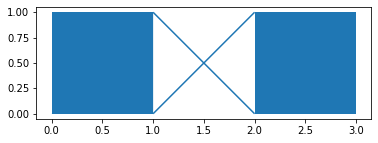

In [26]:
gs #объединение, индексация
gs.geometry #индексированное множество геообъектов (отдельный столбец в датафрейм)
gs.plot()

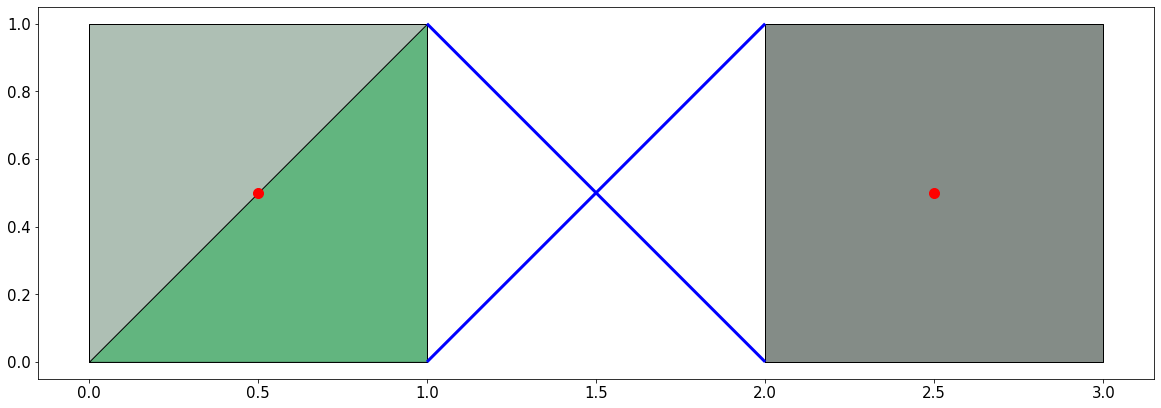

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
#нарисуем тоже самое более контрастно:
gs[:1].plot(ax=ax, facecolor='#aebfb4', edgecolor='black') #треугольник; edgecolor - цвет границы, fаcecolor - заливка
gs[1:2].plot(ax=ax, facecolor='#62b57f', edgecolor='black') #квадрат
gs[2:3].plot(ax=ax, facecolor='#848c87', edgecolor='black') #другой квадрат
gs[3:5].plot(ax=ax, facecolor='red', markersize=100)#две точки
gs[5:].plot(ax=ax, color='blue', linewidth=3)#две линии

for tick in ax.xaxis.get_major_ticks(): #увеличиваем размер делений
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [28]:
gs.area # площади фигур, тип - пандас сериес, выдаёт площадь фигуры, заключённой по данному индексу
#вывод: квадрат, треуг, квадрат, точки и линии

0    1.0
1    0.5
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [29]:
gs.bounds # вывод максимума и минимума координат для каждой оси каждой фигуры
#тут может быть любой сложный полигон

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0
3,0.5,0.5,0.5,0.5
4,2.5,0.5,2.5,0.5
5,1.0,0.0,2.0,1.0
6,1.0,0.0,2.0,1.0


In [30]:
gs.total_bounds  # то же самое только для всей GeoSeries;
#границы для всей сериес

array([0., 0., 3., 1.])

In [31]:
gs.boundary # границы фигур (низкоразмерное представление), для точки границ нет
#для каждой фигуры возвращает фигуру границы. Вывод: 3 линии для кв и треуг, для точек нет, для линии две точки границ

0    LINESTRING (0.000 0.000, 1.000 0.000, 1.000 1....
1    LINESTRING (0.000 0.000, 1.000 0.000, 1.000 1....
2    LINESTRING (2.000 0.000, 3.000 0.000, 3.000 1....
3                             GEOMETRYCOLLECTION EMPTY
4                             GEOMETRYCOLLECTION EMPTY
5                MULTIPOINT (1.000 1.000, 2.000 0.000)
6                MULTIPOINT (2.000 1.000, 1.000 0.000)
dtype: geometry

In [32]:
gs.centroid # центроиды фигур -- точка которая будет в геометрическом центра фигуры

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
3    POINT (0.50000 0.50000)
4    POINT (2.50000 0.50000)
5    POINT (1.50000 0.50000)
6    POINT (1.50000 0.50000)
dtype: geometry

In [33]:
gs.representative_point() # точки, которые гарантировано находятся внутри фигуры (необязательно центроиды)

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
3    POINT (0.50000 0.50000)
4    POINT (2.50000 0.50000)
5    POINT (1.00000 1.00000)
6    POINT (2.00000 1.00000)
dtype: geometry

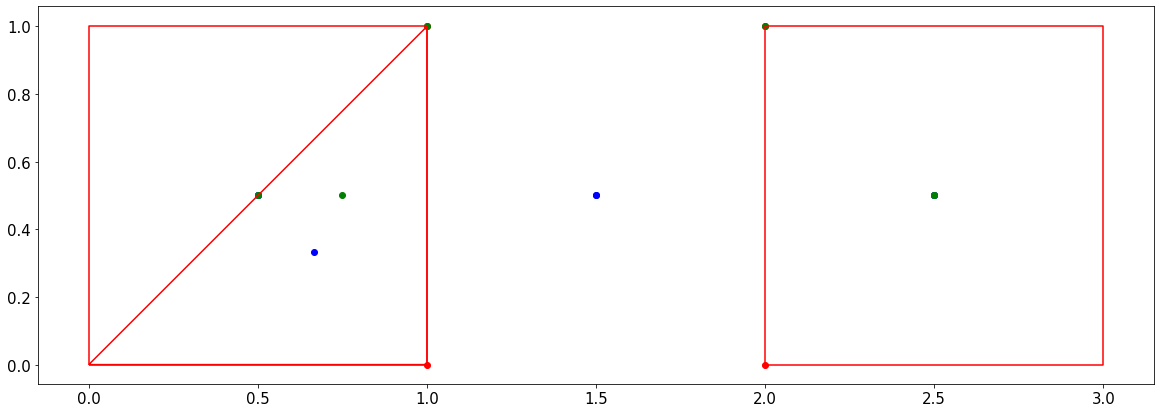

In [34]:
#нарисуем то, что получилось
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

gs.boundary.plot(ax=ax, color='red')#границы фигур
gs.centroid.plot(ax=ax, color='blue')#центроиды
gs.representative_point().plot(ax=ax, color='green')#точки, что гарантированно внутри фигуры (перезатёрли кое-где синие)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [35]:
gs.convex_hull # возвращает минимальную выпуклую фигуру, содержающую изначальную. Для двух точек - линия, 
                # для точки - точка

0    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 1....
2    POLYGON ((2.00000 0.00000, 2.00000 1.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5        LINESTRING (1.00000 1.00000, 2.00000 0.00000)
6        LINESTRING (2.00000 1.00000, 1.00000 0.00000)
dtype: geometry

In [36]:
gs.envelope #вощвращает для каждой фигуры минимальный прямоугольный полигон (стороны параллельны осям), 
#содержащий каждую из исходных фигур

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5    POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
6    POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
dtype: geometry

In [37]:
gs.buffer(0.1) # возвращает все точки находящиеся на заданном расстоянии r от фигуры; именно геометрически (на картах без масштаба)

0    POLYGON ((-0.10000 0.00000, -0.10000 1.00000, ...
1    POLYGON ((-0.07071 0.07071, 0.92929 1.07071, 0...
2    POLYGON ((1.90000 0.00000, 1.90000 1.00000, 1....
3    POLYGON ((0.60000 0.50000, 0.59952 0.49020, 0....
4    POLYGON ((2.60000 0.50000, 2.59952 0.49020, 2....
5    POLYGON ((2.07071 0.07071, 2.07730 0.06344, 2....
6    POLYGON ((1.07071 -0.07071, 1.06344 -0.07730, ...
dtype: geometry

In [38]:
gs.simplify(tolerance=0.05) # возвращает упрощенное представление фигуры -- полигон мб мложным, разбивает полигон на прямоугольники и приближает к чему-либо

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3                              POINT (0.50000 0.50000)
4                              POINT (2.50000 0.50000)
5        LINESTRING (1.00000 1.00000, 2.00000 0.00000)
6        LINESTRING (2.00000 1.00000, 1.00000 0.00000)
dtype: geometry

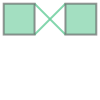

In [39]:
gs.unary_union # объединение всехиндексированных фигур в GeoSeries

In [40]:
type(gs.unary_union) # GeometryCollection -- полигоны, точки, линии (геообъект, содержащий все эти объекты)

shapely.geometry.collection.GeometryCollection

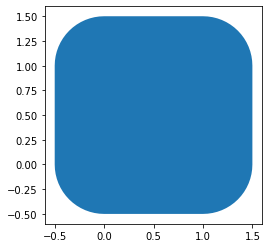

In [41]:
gs[:1].buffer(0.5).plot() #геометрическое округление квадрата

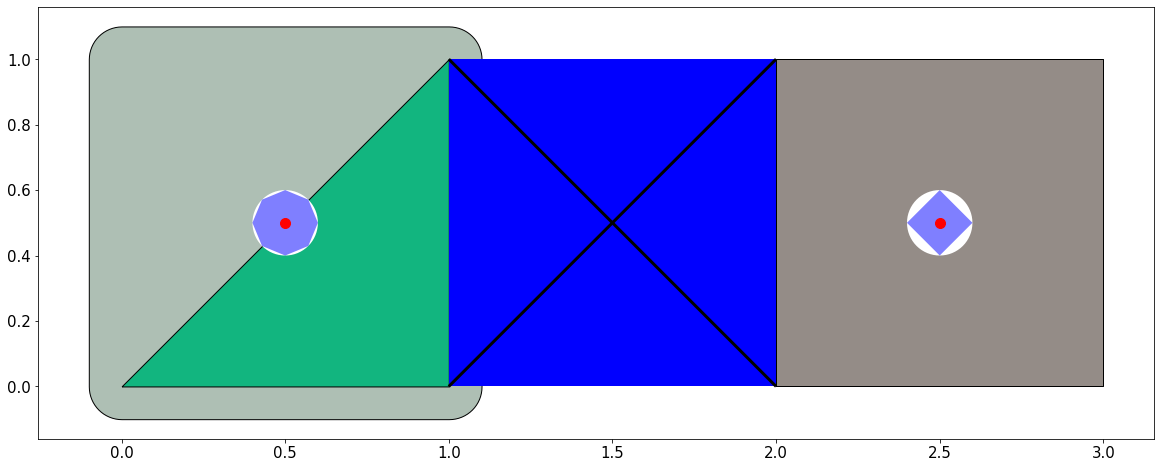

In [42]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

gs[:1].buffer(0.1).plot(ax=ax, facecolor='#aebfb4', edgecolor='black')#левый округлённый квадрат
gs[1:2].plot(ax=ax, facecolor='#12b57f', edgecolor='black')#поверх него треугольник
gs[2:3].plot(ax=ax, facecolor='#948c87', edgecolor='black')#правый квадрат

gs[3:5].buffer(0.1).plot(ax=ax, facecolor='white', markersize=100)#окружность вокруг точки
gs[3:4].buffer(0.1).simplify(tolerance=0.01).plot(ax=ax, color='blue', alpha=0.5)#упрощаем баффер (в многогранник)
gs[4:5].buffer(0.1).simplify(tolerance=0.1).plot(ax=ax, color='blue', alpha=0.5)#--"-- в ромб
gs[3:5].plot(ax=ax, facecolor='red', markersize=100)

gs[5:].envelope.plot(ax=ax, color='blue', linewidth=3)#минимальный полигон для двух линий - квадрат
gs[5:].plot(ax=ax, color='black', linewidth=3)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

In [43]:
triangle - circle #можно вычитать фигуры как цифры

NameError: name 'triangle' is not defined

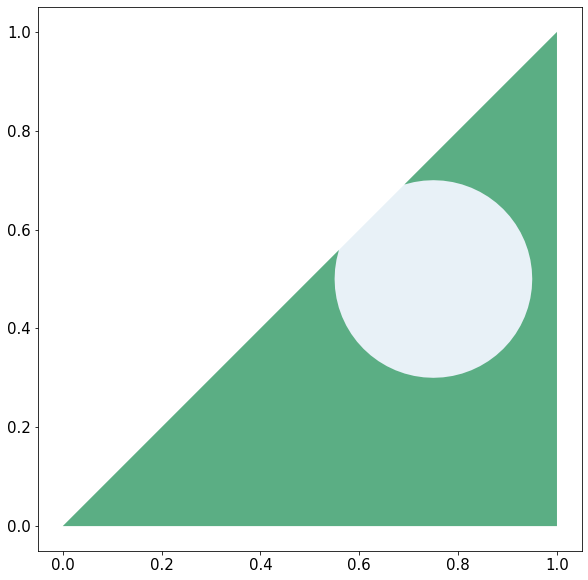

In [44]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()

triangle = gs[1:2].values[0]#треугольник
circle = gs[1:2].representative_point().buffer(0.2).values[0]#окружность вокруг точки внутри треугольника

diff = gpd.GeoSeries([triangle - circle])#(треуг-круг) превращаем в геосериес
diff.plot(ax=ax, color='#62b57f')
diff.convex_hull.plot(ax=ax, alpha=0.1)#комплексное замыкание - ближайшая фигура к нашей, которая выпуклая (треугольник)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

#PS: отличие сериес от геосериес - в последнем необходимо наличие столбца, отвечающего за геометрию

In [45]:
diff.geom_almost_equals(triangle) # проверка то, что "почти" равенство фигур (т.к. могут быть плавающие точки)

0    False
dtype: bool

In [46]:
diff.intersects(triangle) # проверка на пересечение 2-х фигур

0    True
dtype: bool

In [47]:
diff.contains(triangle) # проверка на вхождение - входит ли треугольник в разность

0    False
dtype: bool

In [ ]:
gpd.GeoSeries([triangle]).contains(diff) # проверка на вхождение - входит ли разность в треугольник

In [ ]:
diff.values[0]

In [ ]:
shapely.affinity.rotate(diff.values[0], 50) #вращение фигуры на заданный угол
# используем библ shapely (взаимод геопандас и шэйпли; как пандас и нумпай, матплотлиб)

In [ ]:
shapely.affinity.scale(diff.values[0], xfact=10, yfact=5.0) # масштабирование фигуры по Ox и Oy

In [ ]:
shapely.affinity.skew(diff.values[0], xs=30, ys=1) # наклоны фигуры

In [ ]:
shapely.affinity.translate(diff.values[0], xoff=3.0, yoff=5.0, zoff=0.0)#сдвиг не виден(см. вниз)

In [ ]:
gpd.GeoSeries([diff.values[0], # сдвиги по осям; видимы только если передаём объект геосериес (выше - передаём просто фигуру, сдвиг не виден)
               shapely.affinity.translate(diff.values[0], xoff=1.0, yoff=3.0, zoff=0.0)]).plot()

In [ ]:
# еще больше вариантов преобразований
# https://shapely.readthedocs.io/en/stable/manual.html#affine-transformations

In [ ]:
# считывание гео-данных (из интернета)

moscow_from_link = gpd.read_file('http://polygons.openstreetmap.fr/get_geojson.py?id=2555133&params=0')#считываем
moscow_from_link['geometry'] = moscow_from_link['geometry'].apply(lambda x: x[0])#берем первый элемент геометрии
moscow_from_link.plot(edgecolor='black', figsize=(10, 10))#отрисовываем

In [ ]:
# считываем из файла json
moscow_from_json = gpd.read_file('./moscow.json')
moscow_from_json['geometry'] = moscow_from_json['geometry'].apply(lambda x: x[0])

# запись в geojson (из геодатафрейма в геоджейсон)
# moscow_from_json.to_file("moscow_from_json.geojson", driver='GeoJSON')

In [ ]:
moscow_from_json.plot(edgecolor='black', figsize=(10, 10))#тип - геодатафрейм

In [ ]:
moscow_from_json['name'] = 'Москва'
moscow_from_json # обязательный атрибут GeoDataFrame - поле geometry
moscow_from_json.geometry.name #столбец, отвечающий за название геометрии 

In [ ]:
type(moscow_from_json) # тип - GeoDataFrame

In [ ]:
moscow_from_json.crs # проекция, их очень много и разных - https://en.wikipedia.org/wiki/Map_projection

In [ ]:
# преобразование проекций, перейдём к 3395 - проекции меркатора 
moscow_from_json.to_crs(epsg=3395).plot(edgecolor='black', figsize=(10, 10))

In [ ]:
coronavirus_cases = pd.read_csv('./data/coronavirus_cases.csv')#файл с прошлого занятия
coronavirus_cases = coronavirus_cases.dropna()
coronavirus_cases.head()

In [ ]:
#превращение в геодатафрейм
geometry = []
for _, row in coronavirus_cases.iterrows():
    geometry.append(Point(row.long, row.lat))#бежим и превращаем всё в поинт из шейпли
    
coronavirus_cases['geometry'] = geometry #создаём столбец геометрия
coronavirus_cases = gpd.GeoDataFrame(coronavirus_cases) #датафрейм приводим к геодатафрейму

In [ ]:
coronavirus_cases.head() #появился стобец геометрия

In [ ]:
ax = moscow_from_json.plot(edgecolor='black', figsize=(10, 10)) #нарисовали Москву (геодатфрейм)
coronavirus_cases.plot(ax=ax, color='red') #сверху добавили точки (второй геодаатфрейм)

In [ ]:
import seaborn as sns

#Соты
f, ax = plt.subplots(1, figsize=(20, 5))
moscow_from_link.plot(ax=ax, facecolor='white', edgecolor='black')
hb = ax.hexbin(coronavirus_cases['geometry'].x, coronavirus_cases['geometry'].y, 
               gridsize=20, mincnt=1, edgecolor='white', cmap='tab10')
ax.set_axis_off()
plt.colorbar(hb)
plt.axis('equal')
plt.show()

#Гаусовская апроксимация точек
f, ax = plt.subplots(1, figsize=(15, 5))
moscow_from_link.plot(ax=ax, facecolor='white', edgecolor='black')
sns.kdeplot(coronavirus_cases['geometry'].x, coronavirus_cases['geometry'].y, n_levels=30, cmap='mako')
coronavirus_cases.plot(ax=ax, color='red')
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
# чтение из shape файла
big_moscow = gpd.read_file('./data/big_moscow.shp')#шейп-файл
big_moscow_districts = gpd.read_file('./data/big_moscow_districts.shp')#Москва с разделением на районы

# запись в shape файл (из геодатафрейма)
# big_moscow.to_file(driver='ESRI Shapefile', filename="./data/big_moscow.shp")#драйвер и куда записывать

ax = big_moscow_districts.plot(figsize=(20, 10), edgecolor='white')
ax.set_axis_off()

In [ ]:
big_moscow_districts #id and dataframe of polygons (geometry)

In [ ]:
big_moscow_districts.geometry.iloc[0] #кусочек полигона

In [ ]:
coronavirus_cases #геодатафрейм

In [ ]:
coronavirus_cases.geometry.iloc[0] #точка
coronavirus_cases.geometry.iloc[0].within(big_moscow_districts.geometry.iloc[0])#проверить, входит ли данная точка в указанный кусочек полигона (рисовали его выше)

In [ ]:
big_moscow_districts.iloc[50:100].plot(figsize=(20, 10), edgecolor='white')#отобразить геодатафрейм частями (сохр индексация из пандаса)

In [ ]:
big_moscow_districts #запускать после ниже -- появился столбец coronavirus cases

In [ ]:
big_moscow_districts['coronavirus_cases'] = big_moscow_districts['geometry']\ #бежим по точкам и спрашиваем входит ли она в район
                    .apply(lambda x: sum([point.within(x) for point in coronavirus_cases.geometry])) # within

# отрисовываем
ax = big_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis', #столбец, размер, раскраска
                               edgecolor='white', legend=True) #цвет границ, легенда
ax.set_axis_off()

ax = big_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               scheme='quantiles', #неявное обращение к пайсал, здесь бьёт карту на кусочки, чтобы в итоге она была равномерно одного цвета
                               #если написать equal_interval - по величине
                               edgecolor='white', legend=True) # pySAL - библиотека про геостатистику, оченб классная!
ax.set_axis_off()

In [ ]:
buffer_cases = gpd.GeoDataFrame(coronavirus_cases.geometry.buffer(0.01), columns=['geometry'])#buffer для коронавирусных точек !!это не в метрах, не в градусах, просто в геометрии
buffer_cases.plot()

In [ ]:
overlay = gpd.overlay(buffer_cases, big_moscow_districts) # наложение (пересечение) Москвы с районами и коронавирусных точек

In [ ]:
#рисуем
ax = overlay.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               edgecolor='white', legend=True)
ax.set_axis_off() 

In [ ]:
#хотим получить пересечение Москвы без районов (с фолиума) с большой Москвой с районами
small_moscow_districts = gpd.overlay(moscow_from_json, big_moscow_districts) # overlay
ax = small_moscow_districts.plot(column='coronavirus_cases', figsize=(20, 10), cmap='viridis',
                               scheme='equal_interval', #разбиваем карту по равным интервалам
                               edgecolor='white', legend=True)
coronavirus_cases.plot(ax=ax, color='red', markersize=10) #сверху нарисовали ещё коронавирусные случаи
ax.set_axis_off()

In [ ]:
moscow_from_json #был один большой мультиполигон

In [ ]:
small_moscow_districts #стало много районов

In [ ]:
# пространственный join - по геометрии (пространству)
small_moscow_districts['name'] = 'Москва'
spatial_join = gpd.sjoin(big_moscow_districts, small_moscow_districts, op='within', how='left') #больш М с маленькой, 
#op - если есть хотя бы небольшое совпадение точек, полигоны друг к другу присоединятся, within - внутренний (м М в б М)
#how=left - присоед всё к большой Москве
spatial_join.name = spatial_join.name.fillna('Новая Москва') # наны заполняем строчкой

In [ ]:
spatial_join
#пространственный join в дз, где найти что-то в округах!!!!!

In [ ]:
spatial_join.dissolve(by='name', aggfunc='sum') # протсранственная агрегация; считаем сколько случаев в НМ и М
#указываем по чему аггрегируем и какую функцию применяем